In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# 1. Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2. Create a tf.data.Dataset from the training data
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# 3. Apply a transformation: normalize pixel values
def normalize_images(X, y):
    X = tf.cast(X, tf.float32) / 255.0
    return X, y

dataset = dataset.map(normalize_images)

# 4. Batch the data
dataset = dataset.batch(32)

# 5. Inspect one batch
for X_batch, y_batch in dataset.take(1):
    print("Batch X shape:", X_batch.shape)
    print("Batch y shape:", y_batch.shape)


Batch X shape: (32, 28, 28)
Batch y shape: (32,)


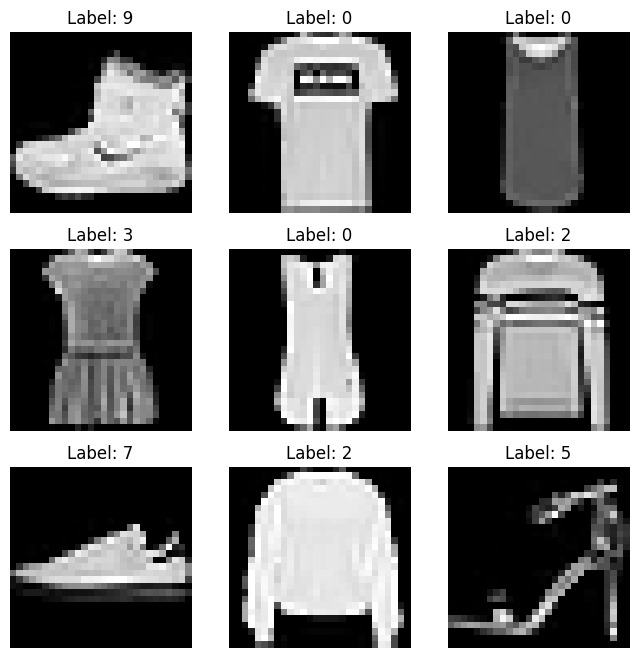

In [2]:
import matplotlib.pyplot as plt

for X_batch, y_batch in dataset.take(1):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i], cmap="gray")
        plt.title(f"Label: {y_batch[i].numpy()}")
        plt.axis("off")
    plt.show()
